# Floating Array Design Project, Moderate Case, Gulf of Maine

## Imports and Styling

In [1]:
from time import perf_counter
from pathlib import Path

import pandas as pd

from waves import Project
from waves.utilities import load_yaml

# Update core Pandas display settings
pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## Configuration

First, we need to set the library path, and then we'll load the configuration file, to show some of
the configurations. For a complete guide and definition, please see either the
[API documentation](https://nrel.github.io/WAVES/api.html) or the
[How to use WAVES guide](https://nrel.github.io/WAVES/getting_started.html#configuring).

In [2]:
library_path = Path("../library/FAD/")
config_floating = load_yaml(library_path / "project/config", "base_floating_moderate.yaml")

# This example was designed prior to the FLORIS 3.6 release, so the path to the turbine library in
# FLORIS must be manually updated, but this example must work for all users, so a dynamic method
# is used below, ensuring this works for all users.
config_floating["floris_config"] = load_yaml(library_path / "project/config", config_floating["floris_config"])

config_floating["floris_config"]["farm"]["turbine_library_path"] = library_path / "turbines"

Now, we'll create a Project for each of the fixed bottom and floating offshore scenarios, showing
the time it takes to initialize each project. Note that we're initializing using the
`Project.from_dict()` `classmethod` because the configurations are designed to also work with the
WAVES command line interface (CLI).

In [3]:
# Add in the library path for both configurations
config_floating.update({"library_path": library_path,})



start2 = perf_counter()

project_floating = Project.from_dict(config_floating)
1
end2 = perf_counter()
print(f"Floating loading time: {(end2-start2):,.2f} seconds")

'H' is deprecated and will be removed in a future version, please use 'h' instead.

ORBIT library intialized at 'C:\iea49_TNO\WAVES\library\FAD'
Floating loading time: 21.48 seconds


Missing data in columns ['bury_speed']; all values will be calculated.

### Visualize the wind farm

Both projects use the same layout, so we'll plot just the fixed bottom plant, noting that the self-connected line at the "OSS1" indicates the unmodeled interconnection point via a modeled export cable.

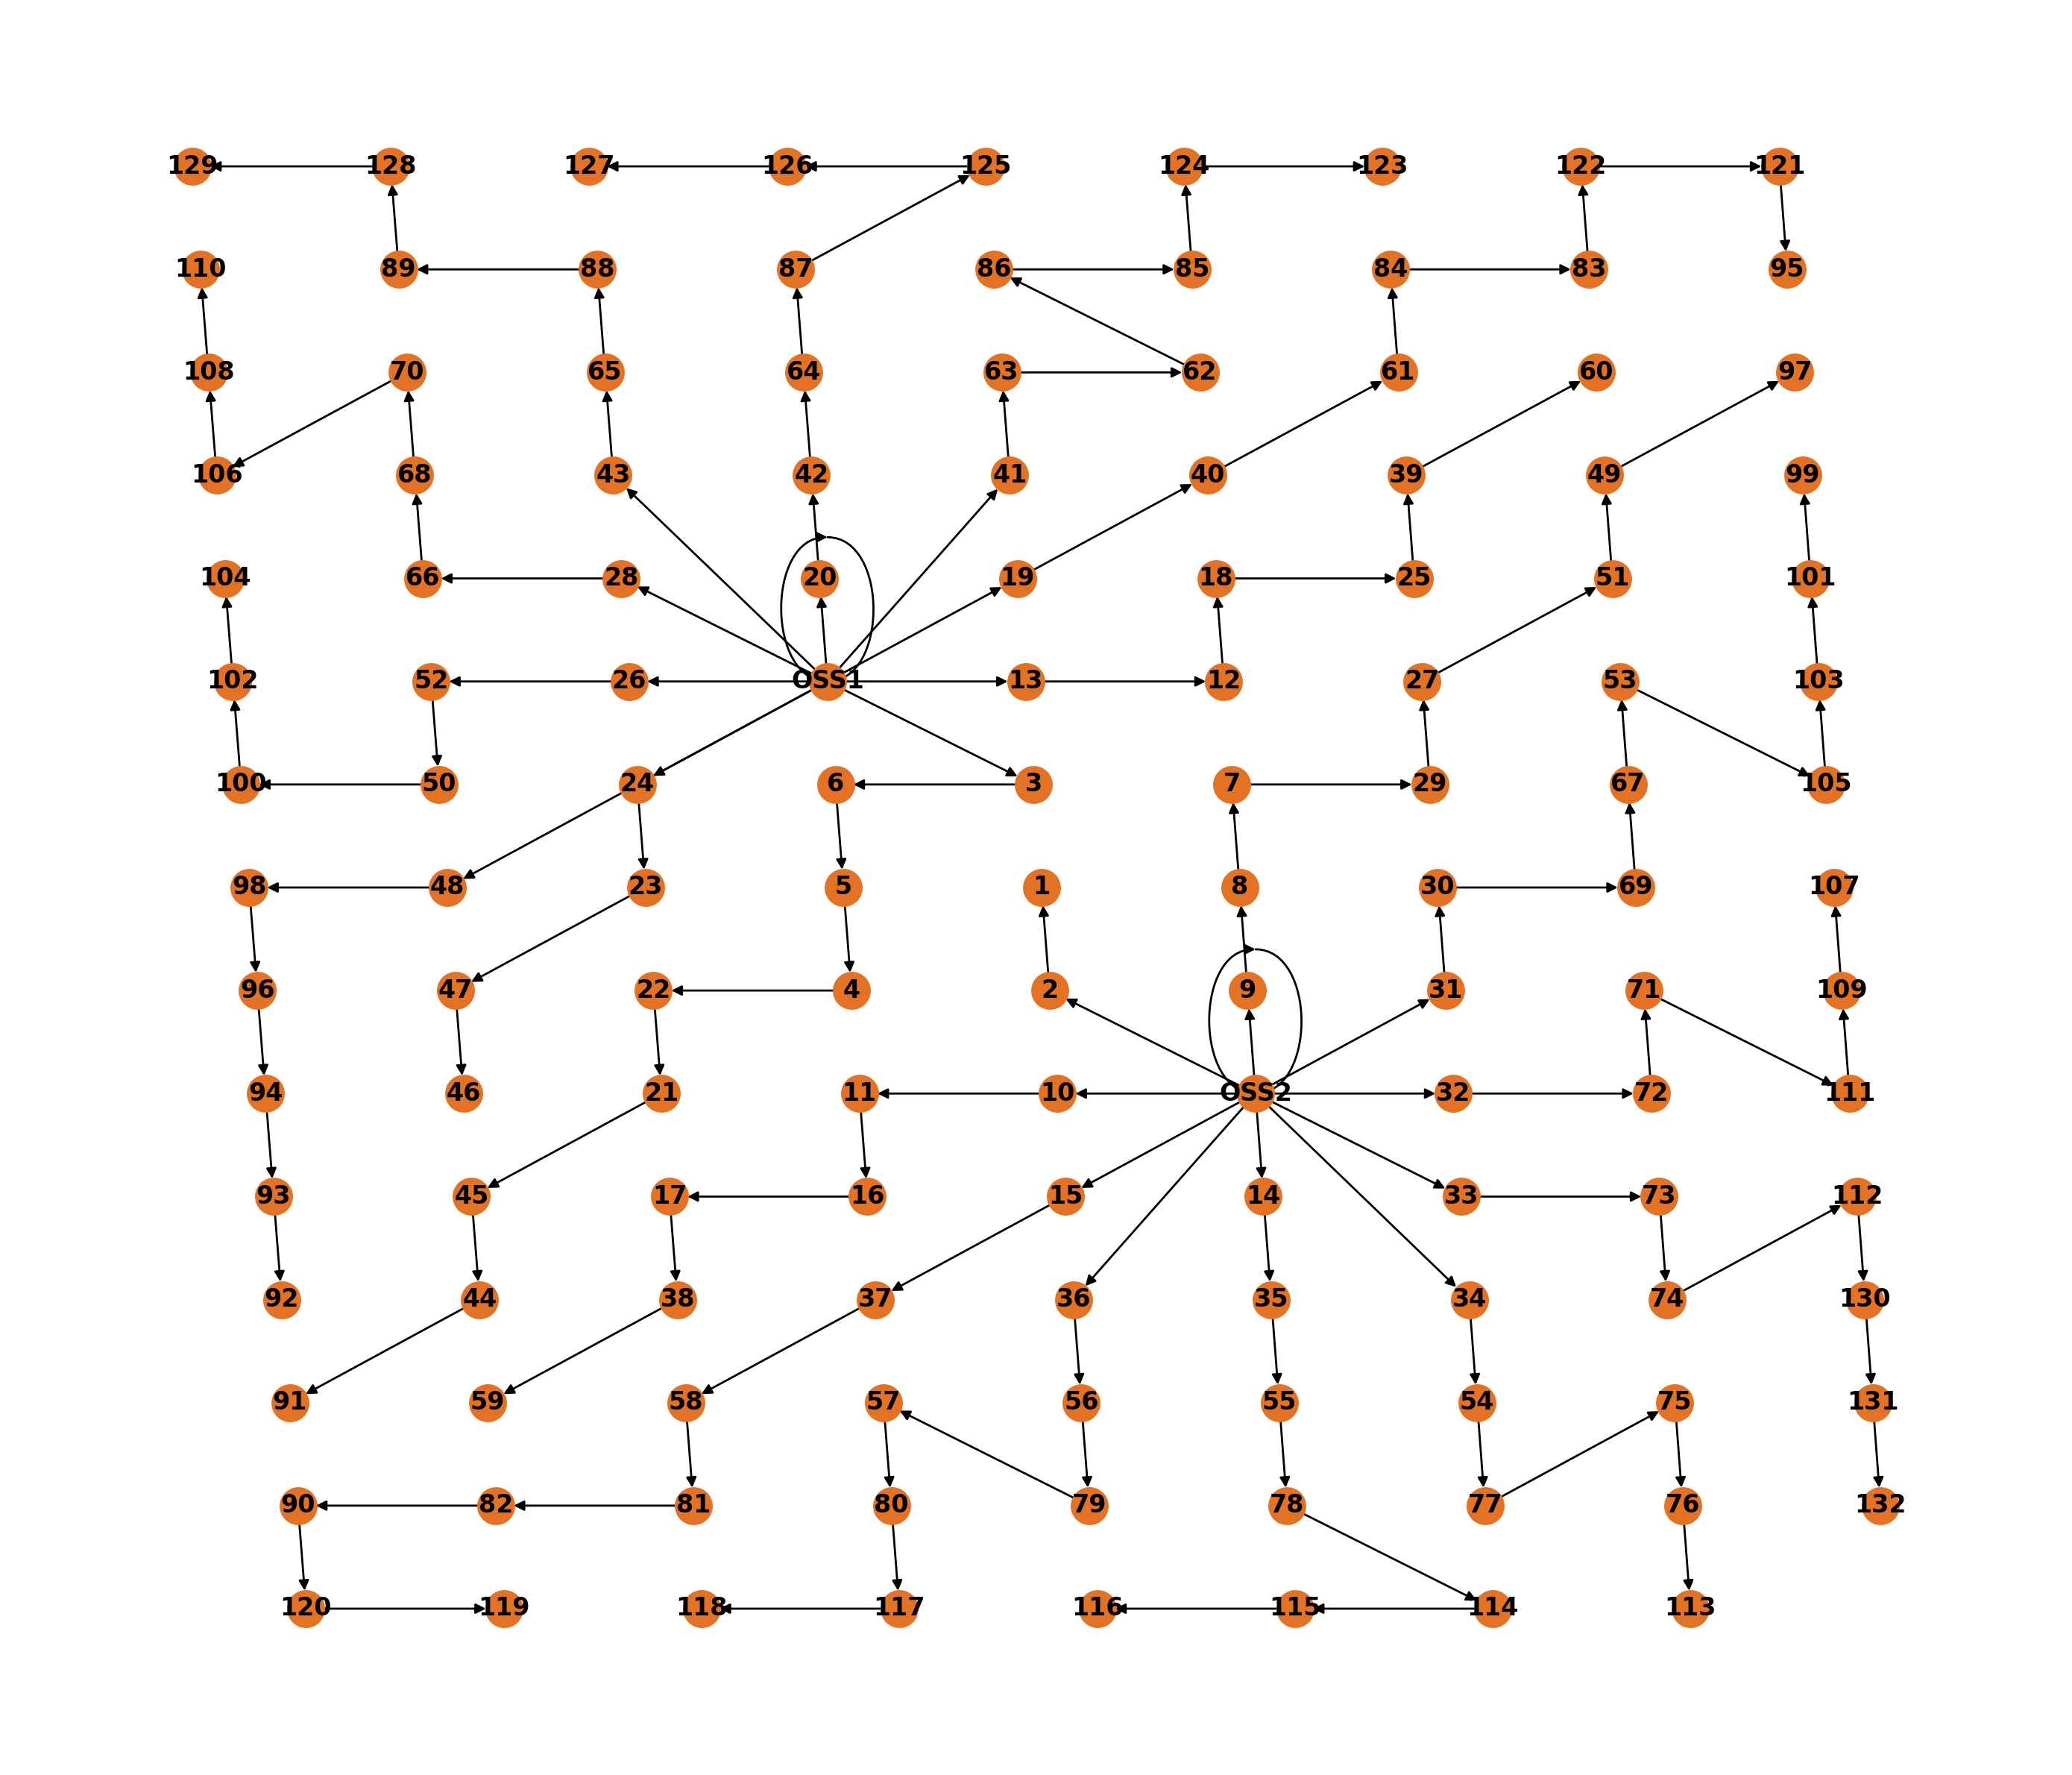

In [4]:
project_floating.plot_farm()

In [5]:
metrics_configuration = {
    "# Turbines": {"metric": "n_turbines"},
    "Turbine Rating (MW)": {"metric": "turbine_rating"},
    "Project Capacity (MW)": {
        "metric": "capacity",
        "kwargs": {"units": "mw"}
    },
    "# OSS": {"metric": "n_substations"},
    "Total Export Cable Length (km)": {"metric": "export_system_total_cable_length"},
    "Total Array Cable Length (km)": {"metric": "array_system_total_cable_length"},
    "CapEx ($)": {"metric": "capex"},
    "CapEx per kW ($/kW)": {
        "metric": "capex",
        "kwargs": {"per_capacity": "kw"}
    },
    "OpEx ($)": {"metric": "opex"},
    "OpEx per kW ($/kW)": {"metric": "opex", "kwargs": {"per_capacity": "kw"}},
    "AEP (MWh)": {
        "metric": "energy_production",
        "kwargs": {"units": "mw", "aep": True}
    },
    "AEP per kW (MWh/kW)": {
        "metric": "energy_production",
        "kwargs": {"units": "mw", "per_capacity": "kw", "aep": True}
    },
    "Net Capacity Factor With All Losses (%)": {
        "metric": "capacity_factor",
        "kwargs": {"which": "net"}
    },
    "Gross Capacity Factor (%)": {
        "metric": "capacity_factor",
        "kwargs": {"which": "gross"}
    },
    "Energy Availability (%)": {
        "metric": "availability",
        "kwargs": {"which": "energy"}
    },
    "LCOE ($/MWh)": {"metric": "lcoe"},
}


# Define the final order of the metrics in the resulting dataframes
metrics_order = [
    "# Turbines",
    "Turbine Rating (MW)",
    "Project Capacity (MW)",
    "# OSS",
    "Total Export Cable Length (km)",
    "Total Array Cable Length (km)",
    "FCR (%)",
    "Offtake Price ($/MWh)",
    "CapEx ($)",
    "CapEx per kW ($/kW)",
    "OpEx ($)",
    "OpEx per kW ($/kW)",
    "Annual OpEx per kW ($/kW)",
    "Energy Availability (%)",
    "Gross Capacity Factor (%)",
    "Net Capacity Factor With All Losses (%)",
    "AEP (MWh)",
    "AEP per kW (MWh/kW)",
    "LCOE ($/MWh)",
    "Potential AEP from WOMBAT (kWh)",
    "Production AEP from WOMBAT (kWh)",
]

capex_order = [
    "Array System",
    "Export System",
    "Offshore Substation",
    "Substructure",
    "Scour Protection",
    "Mooring System",
    "Turbine",
    "Array System Installation",
    "Export System Installation",
    "Offshore Substation Installation",
    "Substructure Installation",
    "Scour Protection Installation",
    "Mooring System Installation",
    "Turbine Installation",
    "Soft",
    "Project",
]

In [6]:
def run_waves(project_floating):
    start2 = perf_counter()
    project_floating.run(full_wind_rose=False)
    project_floating.wombat.env.cleanup_log_files()  # Delete logging data from the WOMBAT simulations
    end2 = perf_counter()
    
    print("-" * 29)  # separate our timing from the ORBIT and FLORIS run-time warnings
    print(f"Floating run time: {end2 - start2:,.2f} seconds")

    return project_floating

In [7]:
from time import perf_counter
from pathlib import Path

import pandas as pd

from waves import Project
from waves.utilities import load_yaml

# Update core Pandas display settings
pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [8]:
import pandas as pd
from time import perf_counter

NUM_RUNS = 20
config_floating = {}  # Assume you define this properly

# Containers for each metric
capex_dfs = []
opex_dfs = []
charter_days_dfs = []
mobilization_dfs = []
delay_dfs = []
failure_cost_dfs = []
equipment_cost_dfs = []
report_dfs = []
losses_dfs = []

for i in range(NUM_RUNS):
    print(f"\nRun {i + 1} of {NUM_RUNS}")

    library_path = Path("../library/FAD/")
    config_floating = load_yaml(library_path / "project/config", "base_floating_moderate.yaml")

    # This example was designed prior to the FLORIS 3.6 release, so the path to the turbine library in
    # FLORIS must be manually updated, but this example must work for all users, so a dynamic method
    # is used below, ensuring this works for all users.
    config_floating["floris_config"] = load_yaml(library_path / "project/config", config_floating["floris_config"])

    config_floating["floris_config"]["farm"]["turbine_library_path"] = library_path / "turbines"
    

    # Load the project
    config_floating.update({"library_path": library_path})
    start = perf_counter()
    project_floating = Project.from_dict(config_floating)
    end = perf_counter()
    print(f"Floating loading time: {end - start:,.2f} seconds")

    # Run simulation
    project_floating = run_waves(project_floating)

    # Load key objects
    ev = project_floating.wombat.metrics.events
    years = project_floating.wombat.env.simulation_years
    metrics = project_floating.wombat.metrics
    materials = metrics.component_costs("project", by_category=True, by_task=True, by_action=False)
    avg_materials = materials[["materials_cost"]] / years

    # 0. CapEx Breakdown
    df_capex_floating = pd.DataFrame(
        project_floating.orbit.capex_detailed_soft_capex_breakdown.items(),
        columns=["Component", "CapEx ($) - Floating"]
    )
    df_capex_floating["CapEx ($/kW) - Floating"] = (
        df_capex_floating["CapEx ($) - Floating"] / project_floating.capacity("kw")
    )

    # Extract the onshore substation cost
    onshore_substation_cost = (
        project_floating.orbit.phases["ElectricalDesign"]
        .detailed_output["export_system"]["onshore_substation_costs"]
    )
    onshore_substation_cost_per_kw = onshore_substation_cost / project_floating.capacity("kw")

    # Append onshore substation as a row
    df_capex_floating.loc[len(df_capex_floating)] = [
        "Onshore Substation",
        onshore_substation_cost,
        onshore_substation_cost_per_kw
    ]

    # Set index for consistent merging
    df_capex_floating.set_index("Component", inplace=True)
    capex_dfs.append(df_capex_floating)
    
    # 1. Annual OpEx
    opex_df = metrics.opex(frequency='annual', by_category=True)
    opex_dfs.append(opex_df)

    # 2. Average Charter Days
    average_charter_days = []
    for name, vessel in project_floating.wombat.service_equipment.items():
        if vessel.settings.onsite or "TOW" in vessel.settings.capability:
            continue
        mobilizations = ev.loc[
            (ev.action.eq("mobilization") & ev.reason.str.contains("arrived on site"))
            & ev.agent.eq(name),
            ["agent", "env_time"]
        ]
        leaving = ev.loc[
            ev.action.eq("leaving site")
            & ev.agent.eq(name),
            ["agent", "env_time"]
        ]
        if mobilizations.shape[0] - leaving.shape[0] == 1:
            mobilizations = mobilizations.iloc[:-1]
        charter_days = (leaving.env_time.values - mobilizations.env_time.values) / 24
        average_charter_days.append([name, charter_days.mean()])
    charter_days_df = pd.DataFrame(average_charter_days, columns=["vessel", "average charter days"]).set_index("vessel")
    charter_days_dfs.append(charter_days_df)

    # 3. Mobilization Summary
    mobilization_summary = (
        ev.loc[ev.action.eq("mobilization") & ev.duration.gt(0), ["agent", "duration"]]
        .groupby("agent")
        .count()
        .rename(columns={"duration": "mobilizations"})
        .join(
            ev.loc[ev.action.eq("mobilization"), ["agent", "duration", "equipment_cost"]]
            .groupby("agent")
            .sum()
        )
    )
    mobilization_summary.duration /= 24
    mobilization_dfs.append(mobilization_summary)

    # 4. Delay Summary
    delay_summary = (
        ev.loc[
            ev.agent.isin(project_floating.wombat.service_equipment)
            & ev.duration.gt(0)
            & ev.action.eq("delay"),
            ["agent", "additional", "duration"]
        ]
        .replace({
            "no work requests submitted by start of shift": "no requests",
            "no work requests, waiting until the next shift": "no requests",
            "weather unsuitable to transfer crew": "weather delay",
            "work shift has ended; waiting for next shift to start": "end of shift",
            "insufficient time to complete travel before end of the shift": "end of shift",
            "will return next year": "end of charter",
        })
        .groupby(["agent", "additional"])
        .sum()
        .reset_index(drop=False)
        .set_index(["agent", "additional"])
        / 24
    )
    delay_dfs.append(delay_summary)

    # 5. Failure Costs
    timing = metrics.process_times()[["N"]].rename(columns={"N": "annual_occurrences"}) / years
    average_failures_costs = (
        avg_materials.reset_index(drop=False)
        .rename(columns={"task": "category", "materials_cost": "annual_materials_cost"})
        .set_index("category")
        .join(timing)
        .reset_index(drop=False)
        .set_index(["subassembly", "category"])
    )
    failure_cost_dfs.append(average_failures_costs)

    # 6. Equipment Cost Summary
    equipment_cost_df = metrics.equipment_costs(frequency="annual", by_equipment=True)
    equipment_cost_dfs.append(equipment_cost_df)

    # 7. Report DF
    project_name_floating = "FAD Moderate Case - Floating"
    report_df_floating = project_floating.generate_report(metrics_configuration, project_name_floating).T
    n_years_floating = project_floating.operations_years
    additional_reporting = pd.DataFrame(
        [
            ["FCR (%)", project_floating.fixed_charge_rate],
            ["Offtake Price ($/MWh)", project_floating.offtake_price],
            [
                "Annual OpEx per kW ($/kW)",
                report_df_floating.loc["OpEx per kW ($/kW)", project_name_floating] / n_years_floating
            ],
            ["Potential AEP from WOMBAT (kWh)", project_floating.wombat.metrics.potential.windfarm.values.sum()/n_years_floating],
            ["Production AEP from WOMBAT (kWh)", project_floating.wombat.metrics.production.windfarm.values.sum()/n_years_floating],
        ],
        columns=["Project"] + report_df_floating.columns.tolist(),
    ).set_index("Project")

    report_df_floating = pd.concat((report_df_floating, additional_reporting), axis=0)
    report_df_floating.index.name = "Metrics"
    report_df_floating.loc[report_df_floating.index.str.contains("%")] *= 100
    report_dfs.append(report_df_floating)

    #8. Losses report
    report_df_losses = project_floating.loss_ratio(breakdown=True)
    losses_dfs.append(report_df_losses) 

# === Compute and save averages ===
def average_and_save(dfs, filename, index_cols=None):
    df_concat = pd.concat(dfs)
    if index_cols:
        df_avg = df_concat.groupby(index_cols).mean()
    else:
        df_avg = df_concat.groupby(level=0).mean()
    df_avg.to_csv(filename)
    print(f"Saved: {filename}")

average_and_save(capex_dfs, "fad-results/moderate_average_capex.csv", index_cols="Component")
average_and_save(opex_dfs, "fad-results/moderate_average_opex.csv")
average_and_save(charter_days_dfs, "fad-results/moderate_average_charter_days.csv", index_cols="vessel")
average_and_save(mobilization_dfs, "fad-results/moderate_average_mobilization_summary.csv", index_cols="agent")
average_and_save(delay_dfs, "fad-results/moderate_average_delay_summary.csv", index_cols=["agent", "additional"])
average_and_save(failure_cost_dfs, "fad-results/moderate_average_failures_costs.csv", index_cols=["subassembly", "category"])
average_and_save(equipment_cost_dfs, "fad-results/moderate_average_equipment_costs.csv")
average_and_save(report_dfs, "fad-results/moderate_average_report_df.csv", index_cols="Metrics")
average_and_save(losses_dfs, "fad-results/moderate_average_losses_report_df.csv")


Run 1 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.

Floating loading time: 18.77 seconds


landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and replaced with ['towing_vessl_groups]['ahts_vessels'].
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`SettingWithCopyWarning: C:\iea49_TNO\WAVES\waves\project.py:759

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

-----------------------------
Floating run time: 1,783.92 seconds

Run 2 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 19.86 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,832.68 seconds

Run 3 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 20.37 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,862.38 seconds

Run 4 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 20.09 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,829.56 seconds

Run 5 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 20.35 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,854.38 seconds

Run 6 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 20.44 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,847.00 seconds

Run 7 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 20.63 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,861.09 seconds

Run 8 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 20.43 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,834.32 seconds

Run 9 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 20.43 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,494.85 seconds

Run 10 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 15.15 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,365.82 seconds

Run 11 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 15.11 seconds


landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and replaced with ['towing_vessl_groups]['ahts_vessels'].
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

-----------------------------
Floating run time: 1,359.89 seconds

Run 12 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 14.79 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,350.33 seconds

Run 13 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.

Floating loading time: 15.49 seconds


landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and replaced with ['towing_vessl_groups]['ahts_vessels'].
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`SettingWithCopyWarning: C:\iea49_TNO\WAVES\waves\project.py:759

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

-----------------------------
Floating run time: 1,321.20 seconds

Run 14 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 15.40 seconds


landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and replaced with ['towing_vessl_groups]['ahts_vessels'].
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

-----------------------------
Floating run time: 1,378.39 seconds

Run 15 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].

Floating loading time: 16.18 seconds


`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and replaced with ['towing_vessl_groups]['ahts_vessels'].
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`SettingWithCopyWarning: C:\iea49_TNO\WAVES\waves\project.py

-----------------------------
Floating run time: 1,370.05 seconds

Run 16 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 18.25 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,386.12 seconds

Run 17 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].

Floating loading time: 15.87 seconds


`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and replaced with ['towing_vessl_groups]['ahts_vessels'].
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`SettingWithCopyWarning: C:\iea49_TNO\WAVES\waves\project.py

-----------------------------
Floating run time: 1,368.52 seconds

Run 18 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 15.33 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,428.79 seconds

Run 19 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 14.99 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,337.71 seconds

Run 20 of 20


'H' is deprecated and will be removed in a future version, please use 'h' instead.UserWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\array_system_design.py:1085
Missing data in columns ['bury_speed']; all values will be calculated.

Floating loading time: 15.40 seconds


Missing data in columns ['bury_speed']; all values will be calculated.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\manager.py:730
landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\design\_cables.py:417
`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].DeprecationWarning: C:\Users\dmulash\.conda\envs\iea49_TNO\Lib\site-packages\ORBIT\phases\install\quayside_assembly_tow\moored.py:94
support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and re

-----------------------------
Floating run time: 1,391.43 seconds
Saved: fad-results/moderate_average_capex.csv
Saved: fad-results/moderate_average_opex.csv
Saved: fad-results/moderate_average_charter_days.csv
Saved: fad-results/moderate_average_mobilization_summary.csv
Saved: fad-results/moderate_average_delay_summary.csv
Saved: fad-results/moderate_average_failures_costs.csv
Saved: fad-results/moderate_average_equipment_costs.csv
Saved: fad-results/moderate_average_report_df.csv
Saved: fad-results/moderate_average_losses_report_df.csv
